In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('sales.csv')
df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Invoice ID  1000 non-null   int64 
 1   Date        1000 non-null   object
 2   Time        1000 non-null   object
 3   Gender      1000 non-null   object
 4   Location    1000 non-null   object
 5   City        1000 non-null   object
 6   Member      1000 non-null   object
 7   Category    1000 non-null   object
 8   Price       1000 non-null   int64 
 9   Quantity    1000 non-null   int64 
 10  Total       1000 non-null   int64 
 11  Payment     1000 non-null   object
 12  Rating      1000 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


** Task 1 : Which location has highest and lowest sales? Represent the sales on a barchart, also show the market share for each location using a pie chart. **

In [4]:
df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [5]:
# sales total in different locations
df.groupby('Location').sum()['Total']

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

In [6]:
location_list=df.groupby('Location')
location=[x for x,y in location_list]

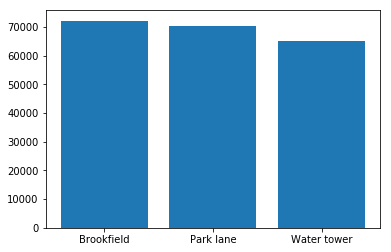

In [7]:
# bar chart 
plt.bar(location,df.groupby('Location').sum()['Total']);

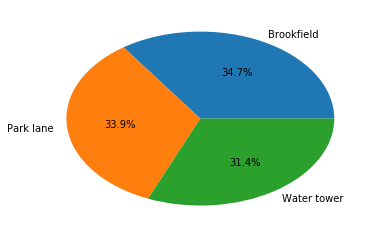

In [8]:
# pie chart
plt.pie(df.groupby('Location').sum()['Total'],labels=location,autopct='%1.1f%%');

* Brookfield has highest sales.
* Watertower has lowest sales.

** Task 2 : Which locations has more female customers and male customers? **

In [9]:
location_sales=df.groupby(['Gender','Location']).count()['Invoice ID'].unstack(level=1)
location_sales

Location,Brookfield,Park lane,Water tower
Gender,,,
Female,179,179,143
Male,161,153,185


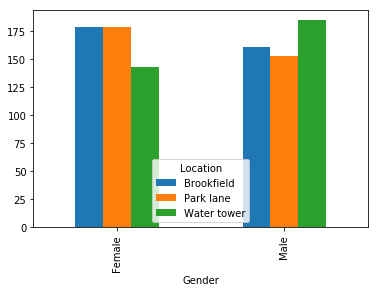

In [10]:
location_sales.plot(kind='bar');

* Brookfield and Parklane has more number of female customers.
* Whereas, Watertower has more male customers than other locations.

** Task 3: what days of the month make more sales? **

In [11]:
df['Day']=pd.to_datetime(df['Date']).dt.day
df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18


In [12]:
df.groupby('Day').sum()['Total']

Day
1     6301
2     8247
3     8533
4     6593
5     9177
6     5976
7     6164
8     8313
9     9142
10    6444
11    4755
12    7714
13    5688
14    7978
15    9677
16    5912
17    5833
18    4625
19    7481
20    7333
21    4300
22    5788
23    6949
24    7819
25    8638
26    7165
27    8154
28    6467
29    4662
30    3530
31    2430
Name: Total, dtype: int64

In [13]:
df.groupby('Day').sum()['Total'].max()

9677

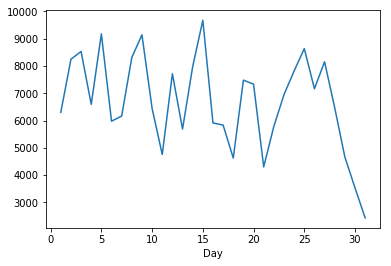

In [14]:
df.groupby('Day').sum()['Total'].plot();

* Day 15 makes more sales.

** Task 4: Which branch has more members vs less members? **

In [15]:
members=df.groupby(['Member','Location']).count()['Invoice ID'].unstack(level=1)
members

Location,Brookfield,Park lane,Water tower
Member,,,
No,173,167,159
Yes,167,165,169


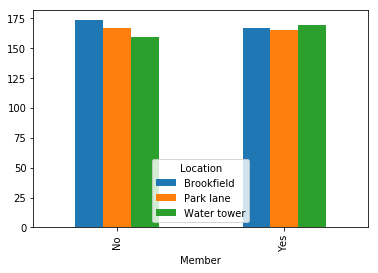

In [16]:
members.plot(kind='bar');

* Watertower has more members.
* Parklane has less members.

** Task 5: Which branch has highest and lowest rating? **

In [17]:
rating=df.groupby('Location').mean()['Rating']
rating

Location
Brookfield     2.782353
Park lane      3.021084
Water tower    3.118902
Name: Rating, dtype: float64

In [18]:
df[df['Rating']==5].groupby('Location').count()['Invoice ID']

Location
Brookfield     58
Park lane      71
Water tower    75
Name: Invoice ID, dtype: int64

In [19]:
df[df['Rating']==1].groupby('Location').count()['Invoice ID']

Location
Brookfield     84
Park lane      63
Water tower    61
Name: Invoice ID, dtype: int64

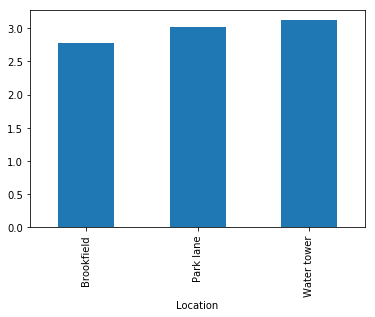

In [20]:
rating.plot(kind='bar');

* Watertower has more and Brookfield has less average in rating.

** Task 6: which city has more female shopping? **

In [21]:
df.groupby(['Gender','City']).sum()['Total'].unstack(level=1)

City,Chicago,Dallas,NewYork
Gender,,,
Female,30199,38937,37316
Male,35016,31495,34825


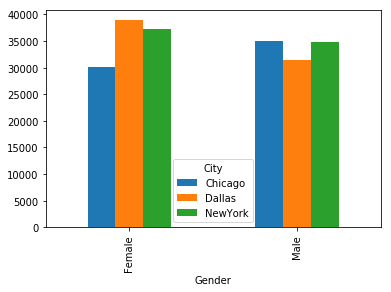

In [22]:
df.groupby(['Gender','City']).sum()['Total'].unstack(level=1).plot(kind='bar');

In [23]:
df[df['City']=='Dallas'].groupby(['Gender','Category']).sum()['Total'].unstack(level=0)

Gender,Female,Male
Category,,
Books,7639,6909
Clothing,5842,6770
Fashion,6485,5328
Furniture,4659,4200
Groceries,6055,3004
Sporting,8257,5284


* Dallas has more sales or shopping from female customers.

** Task 7: Who spends more, male or female?**

In [24]:
df.groupby(['Gender']).sum()['Total']

Gender
Female    106452
Male      101336
Name: Total, dtype: int64

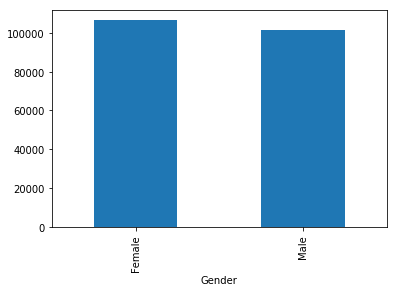

In [25]:
df.groupby(['Gender']).sum()['Total'].plot(kind='bar');

* female spends more in shopping than men.

** Task 8: Which type of customer spends more, member or non-member? **

In [26]:
df.groupby(['Member']).sum()['Total']

Member
No     100245
Yes    107543
Name: Total, dtype: int64

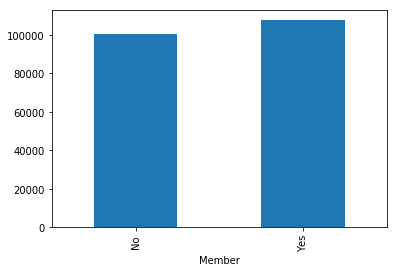

In [27]:
df.groupby(['Member']).sum()['Total'].plot(kind='bar');

* Customer's who is a member spends more than non- member.

** Task 9 : Which product line sells more? **

In [28]:
df.groupby('Category').count()['Quantity']

Category
Books        165
Clothing     170
Fashion      153
Furniture    160
Groceries    174
Sporting     178
Name: Quantity, dtype: int64

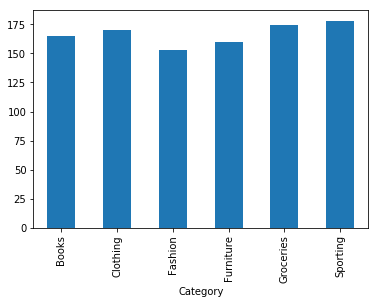

In [29]:
df.groupby('Category').count()['Quantity'].plot(kind='bar');

* Sporting items sells more.

** Task 10: Which product line is popular among men and women? **

In [30]:
df.groupby(['Category','Gender']).count()['Quantity'].unstack(level=0)

Category,Books,Clothing,Fashion,Furniture,Groceries,Sporting
Gender,,,,,,
Female,88,81,81,78,87,86
Male,77,89,72,82,87,92


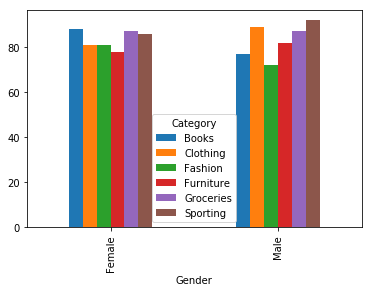

In [31]:
df.groupby(['Category','Gender']).count()['Quantity'].unstack(level=0).plot(kind='bar');

* Books item where more purchased by women.
* whereas, Sporting item by men.

** Task 11: Which month makes more sales? **

In [32]:
df['Month']=pd.to_datetime(df['Date']).dt.month
df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day,Month
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25,1
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25,2
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18,2


In [33]:
df.groupby(['Month']).sum()['Total']

Month
1    71652
2    63850
3    72286
Name: Total, dtype: int64

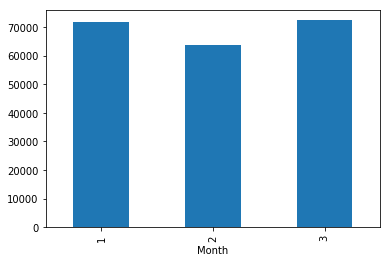

In [34]:
df.groupby(['Month']).sum()['Total'].plot(kind='bar');

* 3rd month has more sales compared with other months.

### Conclusion
1. Brookfield in the New York city has taken 34.7% of sales, Parklane in Dallas has 33.9% and Watertower in Chicago has 31.4% of sales.
2. Brookfield and Parklane has more number of female customers, whereas Watertower has more men customers for shopping.
3. When we analyzing each days of months, Day 15 has more sales happens, it is about sum of 9677/-
4. Watertower has more sales happens from members, whereas less-member purchase more from Parklane.
5. * Taking the average of rating, Watertower has 3.12 , Parklane has 3.02 and Brookfield has 2.78.
   * 75 customers from Watertower gives 5 star and 84 customers from  Brookfield gives 1 star rating.
6. Female shoppers more at Dallas City.
7. By taking the sum of total sales for 3 months, Females spend 1,06,452/- and mens spend 1,01,336 having a total difference of 5116/-
8. Member's spends more of total 1,07,543/-, whereas non-members spends total of 1,00,245/- with a differnce of 7298/-
9. Sporting items has more purchase compared with other items.
10. Books are more popular line among women and for men it is sporting.
11. Highest sales in 3rd month of total about 72,286/- , 1st month of 71,652/- and lowest in 2nd month of 63,850/-